# Modelling SPDC using superconducting qubits

*Teammembers (in alphabetical order)*

* Mohammad Sahnawaz Alam
* Pallavi Bhardwaj
* Tabea Fünning
* Jaroslav Kysela
* Michael Schrödl-Baumann
* Mike Taverne


## Presentation slides
https://docs.google.com/presentation/d/1w7aNlGFCkxzRF_F274jCIw3pSWZ4vip-whXrdA4rb5Q/edit?usp=sharing

## How can the utilization of squeezed coherent states in superconducting qubits potentially address the challenges of measurement precision, decoherence, and quantum information transfer, thereby advancing the development of quantum hardware?

## Introduction:

IBM Quantum computers do not represent the only quantum computing architecture... :astonished: However cool IBM superconducting-qubits-based computers are, there is also an alternative architecture based on non-classical states of light. For the efficient implementation of photonic-based quantum computers, the precise characterization of photonic chips and photon sources is indispensable. In our project, we focus on the generation of a class of states that are central to the photonic architecture -- the states generated by [spontaneous parametric down-conversion (SPDC)](https://en.wikipedia.org/wiki/Spontaneous_parametric_down-conversion).

SPDC is arguably the most important physical process for generating entangled photons (with quantum dots being another possible source of photonic entanglement). It has been used in a multitude of quantum information tasks such as Bell tests and quantum key distribution (QKD). Maximally entangled polarization-encoded Bell states can be created this way, which states are locally equivalent to:
$$
|\Psi\rangle = \frac{1}{\sqrt{2}} (|H_1 V_2\rangle + |V_1 H_2\rangle),
$$
where $H_1$ represents a horizontally polarized photon propagating along path 1 etc. If we rewrite such a state in the Fock basis and focus on the number of photons in propagation paths, rather than the polarization, this state turns into $|11\rangle$. It means there is exactly one photon in either path.

What is very often neglected though is that SPDC creates a more complex quantum state, of which $| \Psi \rangle$ is only one of infinitely many terms appearing in a superposition. Strictly speaking, the state produced by the down-conversion process is the [**two-mode squeezed vaccum**](https://en.wikipedia.org/wiki/Squeezed_coherent_state#Two-mode_squeezed_states). Its mathematical form reads:
$$
|\text{TMSV}\rangle = \frac{1}{\cosh r} \sum_{n=0}^\infty (-e^{i \phi}\tanh r)^n  |nn\rangle.
$$
From now on, we fix $\phi = \pi$ for simplicity so that the state is of the form:
$$
|\text{TMSV}\rangle = \frac{1}{\cosh r} (|00\rangle + \tanh r \, |11\rangle + (\tanh r)^2|22\rangle + \ldots).
$$
The so-called *squeezing parameter* $r$ is usually very small and so the leading term $|00\rangle$ corresponding to vacuum is prevalent, while the only non-negligible contribution comes from the first higher-order term $| 11 \rangle$. This term corresponds to a Bell state. To study the general scenario, the effect of higher orders cannot be neglected anymore and the squeezing parameter can be kept as a free parameter ($0 < r < 1$).

The two-mode squuezed vacuum with a general squeezing parameter $r$ is the state we decided to generate. Due to a finite number of qubits the infinite series has to be truncated and so we introduce a cutoff $N$, such that the state lives in a $2N$-dimensional Hilbert space and contains $2^N$ terms, for details see below.

#### Note 1 - Self-describing quantum computer
A superconducting quantum computer models a quantum state produced by SPDC, which state can be used in a photonic quantum computer. The photonic computer can then in turn simulate the superconducting computer... :open_mouth:

#### Note 2 - Decoherence
As a matter of fact, when the phase $\phi$ in the state above is not fixed and fluctuates randomly, the pure state $|\text{TMSV}\rangle$ turns into a classical mixture:
$$
\rho_1 = \frac{1}{\cosh^2(r)} \sum_{n=0}^\infty \tanh^{2n}(r)
|n \rangle \langle n|.
$$
One could think of making use of the natural decoherence of IBM Quantum computers to our advantage and simulate an approximation to this mixed state as well. This way, we could (maybe) turn the bottleneck of the quantum computers to our advantage.


## Idea


As the naive approach we choose to use qiskit quantum circuit method *initialize*, which creates a gate which initializes the qubits into the desired state. Afterwards we apply qiskits *transpile* function with the gate set $\text{CX}, \text{ID}, \text{RZ}, \text{SX}$ and $\text{X}$ to turn it into a circuit which only uses gates which are physically realized on IBM hardware.

The improved approach relies on a mathematical reformulation of the $| \text{TMSV} \rangle$ state. It can be decomposed into a tensor product of two-qubit states, each of which is of the form $| 00 \rangle + R^k | 11 \rangle$ and can be created using a single $\text{R}_Y$ rotation and a single $\text{CNOT}$ gate (aka $\text{CX}$ gate). The resulting circuit thus consists of a layer of rotations (with properly chosen rotation angles) and a layer of $\text{CNOT}$s.

## Installing Qiskit

In [ ]:
!pip install qiskit

In [ ]:
!pip install qiskit_ibm_runtime

To draw the quantum circuits:

In [ ]:
!pip install pylatexenc

## Importing the necessary modules

In [ ]:
# Importing standard Qiskit libraries
from qiskit import QuantumCircuit, transpile
from qiskit.tools.jupyter import *
from qiskit.visualization import *
from qiskit_aer import AerSimulator
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit

# qiskit-ibmq-provider has been deprecated.
# Please see the Migration Guides in https://ibm.biz/provider_migration_guide for more detail.
from qiskit_ibm_runtime import QiskitRuntimeService, Sampler, Estimator, Session, Options

# Loading your IBM Quantum account(s)
#service = QiskitRuntimeService(channel="ibm_quantum")

# Invoke a primitive inside a session. For more details see https://qiskit.org/documentation/partners/qiskit_ibm_runtime/tutorials.html
# with Session(backend=service.backend("ibmq_qasm_simulator")):
#     result = Sampler().run(circuits).result()

import numpy as np
import math
import random
from scipy.linalg import fractional_matrix_power

from qiskit import QuantumCircuit, quantum_info
from qiskit import transpile

from PIL.Image import new as newimage, Image
from IPython.display import display


from qiskit import execute, Aer

from qiskit_ibm_provider import IBMProvider

import qiskit

from qiskit import QuantumCircuit
from qiskit.quantum_info import state_fidelity
from qiskit import Aer, transpile
from qiskit import QuantumCircuit, execute, BasicAer
from qiskit.quantum_info import DensityMatrix
from qiskit.visualization import plot_state_city

# Importing standard Qiskit libraries
from qiskit import QuantumCircuit, transpile
from qiskit.tools.jupyter import *
from qiskit.visualization import *
from qiskit_aer import AerSimulator

import matplotlib.pyplot as plt

#provider = IBMProvider(token = 'ee712578df2a7f42e88af625ebfb80eee6267221d8d36da70c6cf1bd4cc45591054561622207e7b57713592c212ee22bf729a80d7d6ba09b35fbbea7cc015925')
'''
#hub = "ibm-q-community"
group = "digiq-icfo-hack"
project = "main"

backend_name = "ibmq_jakarta" # 7 qubits
#backend_name = "ibmq_guadalupe	" # 16 qubits

backend_qc = provider.get_backend(backend_name, instance=f"{hub}/{group}/{project}")
'''

'\n#hub = "ibm-q-community"\ngroup = "digiq-icfo-hack"\nproject = "main"\n\nbackend_name = "ibmq_jakarta" # 7 qubits\n#backend_name = "ibmq_guadalupe\t" # 16 qubits\n\nbackend_qc = provider.get_backend(backend_name, instance=f"{hub}/{group}/{project}")\n'

## Utility functions

In [ ]:
def Rn(n, r=1, phi=np.pi):
    '''
    Return the Rn coefficients of the states.
    '''
    return (1/np.cosh(r))*( ( -np.exp(1j*phi)*np.tanh(r) )**n )

In [ ]:
def getTargetStateBasic(N, r=1, phi=np.pi):
    '''
    Return a list of the necessary Rn coefficients for a given N.

    N: cutoff
    2*N: Number of qbits
    2**N: Number of states
    '''
    Nstates = 2**N

    L = [Rn(n, r=r, phi=phi) for n in range(Nstates)]
    L = L / np.linalg.norm(L)
    return L

In [ ]:
def prettyBin(num, N):
    '''
    Returns *num* as a binary string, zero-padded to N digits.
    ex: prettyBin(3, 6) -> '000011'
    '''
    return '{num:0{N}b}'.format(num=num, N=N)

In [ ]:
def getStateIndex(idx_v1_dec, N):
    '''
    Returns the decimal index of the 'ith state'.
    Ex: N=3, 2nd state -> idx_v1 = '010' -> idx_v2 = '010010' -> idx_v2 = 18
    getStateIndex(2, 3) -> 18
    '''
    idx_v1_bin = prettyBin(idx_v1_dec, N)
    idx_v2_bin = 2 * idx_v1_bin
    idx_v2_dec = int(idx_v2_bin, 2)
    return idx_v2_dec

In [ ]:
def getTargetStateAdvanced(N, r=1, phi=np.pi):
    '''
    Return a list of the necessary Rn coefficients for a given N, but mapped to a system of 2*N qubits.

    N: cutoff
    2*N: Number of qbits
    2**N: Number of states
    '''

    L = getTargetStateBasic(N, r=r, phi=phi)

    Nqbits = 2*N
    LL = 0j*np.ones(2**Nqbits)

    for idx,val in enumerate(L):
        idx_v2 = getStateIndex(idx, N)
        LL[idx_v2] = val

    return LL

## Defining test parameters

In [ ]:
# cutoff
N = 2
# squeezing parameter
r = 1
# phi
phi = np.pi

## Plotting the Rn coefficients

In [ ]:
Nstates = 2**N
n = range(Nstates) # values for which to calculate Rn
y = getTargetStateBasic(N, r=r, phi=phi)
plt.plot(n, np.real(y), 'b-o', label='$real(R_n)$')
plt.plot(n, np.imag(y), 'r-o', label='$imag(R_n)$')
plt.xlabel('n')
plt.ylabel('$R_n$')
plt.title(f'N={N}, r={r}, phi={phi}')
plt.legend()
plt.show()

In [ ]:
# probabilities
P = np.abs(y)**2
plt.plot(n, P, '-o')
plt.xlabel('n')
plt.ylabel('$|R_n|^2$')
plt.title(f'N={N}, r={r}, phi={phi}')
plt.show()

## Creating a basic reference circuit by simply initializing the state to the theoretical TMSV state
Qiskit's *initialize()* function is used to directly initialize the state to the theoretical TMSV state.

In [ ]:
def getReferenceQuantumCircuit(N, r=1, phi=np.pi):
    '''
    Returns a quantum circuit representing the TMSV state with parameters:

        * cutoff *N*,
        * squeezing parameter *r*
        * *phi*
    '''
    Nqbits = 2*N
    qc = QuantumCircuit(Nqbits)
    x = getTargetStateAdvanced(N, r=r, phi=phi)
    qc.initialize(x, qubits=range(Nqbits))
    return qc

In [ ]:
qc = getReferenceQuantumCircuit(N, r=r, phi=phi)
qc.draw('mpl')

A state city plot of the reference TMSV state:

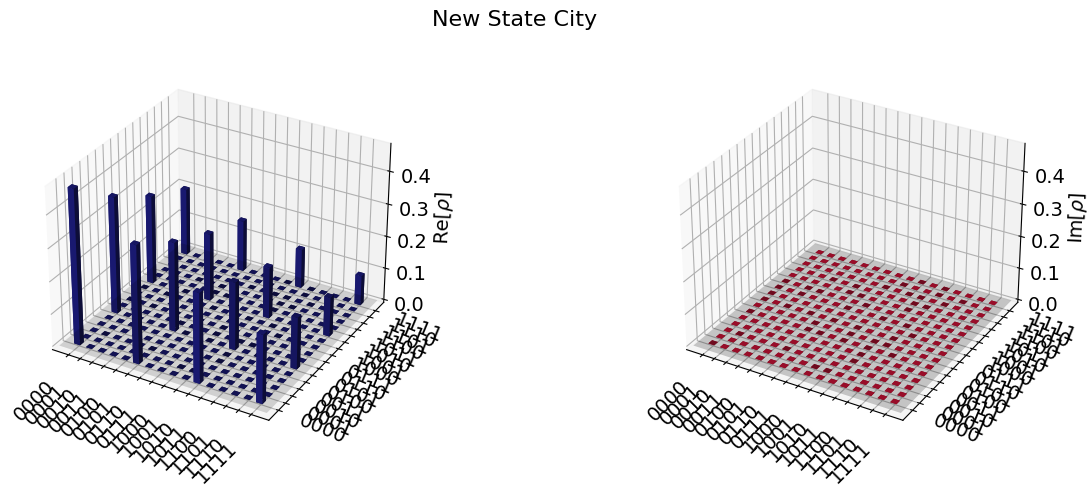

In [ ]:
state = DensityMatrix(qc)
plot_state_city(state, color=['midnightblue', 'crimson'], title="New State City")

## Fidelity test functions

Test functions are created that return a fidelity value by testing a given quantum circuit *qc* against the reference TMSV state created by using the *initialize()* function.

In [ ]:
def checkQuantumCircuit_v1(qc, N, r=1, phi=np.pi):
    '''
    Uses the execute function to generate state vectors of the reference circuit and the passed qc circuit and runs state_fidelity between them.
    '''
    qc_ref = getReferenceQuantumCircuit(N, r=r, phi=phi)

    backend = Aer.get_backend('statevector_simulator')

    sv_ref = execute(qc_ref, backend).result().get_statevector(qc_ref)
    sv = execute(qc, backend).result().get_statevector(qc)

    return state_fidelity(sv_ref, sv)

In [ ]:
def checkQuantumCircuit_v2(qc, N, r=1, phi=np.pi):
    '''
    Uses the state_fidelity on the density matrices of the reference circuit and the passed qc circuit.
    '''
    qc_ref = getReferenceQuantumCircuit(N, r=r, phi=phi)
    state_ref = DensityMatrix(qc_ref)
    state = DensityMatrix(qc)
    return state_fidelity(state_ref, state)

Testing the fidelity functions on the reference ciruit:

In [ ]:
# Calculate fidelity
f1 = checkQuantumCircuit_v1(qc, N, r=r, phi=phi)
f2 = checkQuantumCircuit_v2(qc, N, r=r, phi=phi)
print(f'checkQuantumCircuit_v1: f={f1}')
print(f'checkQuantumCircuit_v2: f={f2}')

checkQuantumCircuit_v1: f=1.0
checkQuantumCircuit_v2: f=1.0000000000000004


## Evaluating the complexity of the reference circuit generated by simply transpiling the desired TMSV state

We use the set of real gates provided by the IBM quantum computers:

* cx
* id
* rz
* x
* sx


In [ ]:
#Transpiling with the available basic gates
circuit = transpile(qc, basis_gates=['cx', 'id', 'rz', 'x', 'sx'])

The circuit created from the reference quantum circuit:

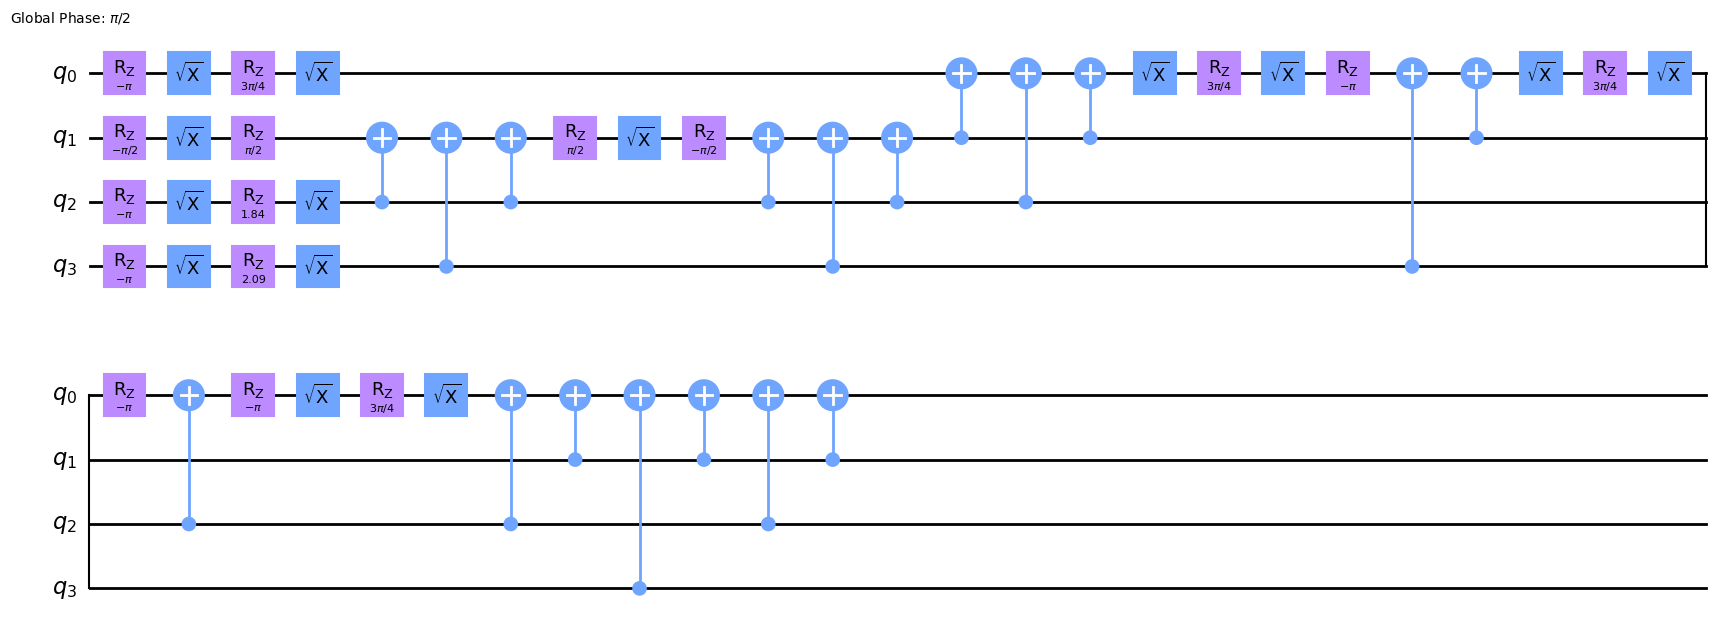

In [ ]:
circuit.draw('mpl')
#plt.savefig('ref_circuit_transpiled.png',dpi = 1200, transparent = True)

## Circuit optimization

We implemented an optimized version of the circuit inspired by the Quantum fourier transform.

The following function returns the necessary circuit for any values of N, r and phi:

In [ ]:
##Implementing a n-qubit using Quantum fourier transform

def TMSVQuantumCircuit(N, r=1, phi=np.pi):
    n = 2*N #Number of registers
    qreg_q = QuantumRegister(n, 'q')
    #creg_c = ClassicalRegister(n, 'c')
    qc = QuantumCircuit(qreg_q)


    R = np.tanh(r)#-0.5
    for i in range(N):

        theta =  2*np.arctan(R**(2**i))
        qc.ry(theta, qreg_q[i])
        qc.cx(qreg_q[i], qreg_q[N+i])
    return qc

In [ ]:
r = 0.1
phi = np.pi

qc_ref_depth = []
qc_TMSV_depth = []

qc_ref_f1 = []
qc_TMSV_f1 = []

qc_ref_f2 = []
qc_TMSV_f2 = []

Cut_off = np.arange(1,5)

for N in Cut_off:
    print(N)
    qc_ref = getReferenceQuantumCircuit(N, r=r, phi=phi)
    qc_ref = transpile(qc_ref, basis_gates=['cx', 'id', 'rz', 'x', 'sx'])

    qc_TMSV = TMSVQuantumCircuit(N, r=r, phi=phi)
    qc_TMSV = transpile(qc_TMSV, basis_gates=['cx', 'id', 'rz', 'x', 'sx'])

    qc_ref_depth.append(qc_ref.depth())
    qc_TMSV_depth.append(qc_TMSV.depth())

    f1_ref = checkQuantumCircuit_v1(qc_ref, N, r=r, phi=phi)
    f2_ref = checkQuantumCircuit_v2(qc_ref, N, r=r, phi=phi)

    f1_TMSV = checkQuantumCircuit_v1(qc_TMSV, N, r=r, phi=phi)
    f2_TMSV = checkQuantumCircuit_v2(qc_TMSV, N, r=r, phi=phi)


    qc_ref_f1.append(f1_ref)
    qc_ref_f2.append(f2_ref)

    qc_TMSV_f1.append(f1_TMSV)
    qc_TMSV_f2.append(f2_TMSV)
#qc.measure(qreg_q, creg_c)
#qc.draw()

1


NameError: ignored

ValueError: ignored

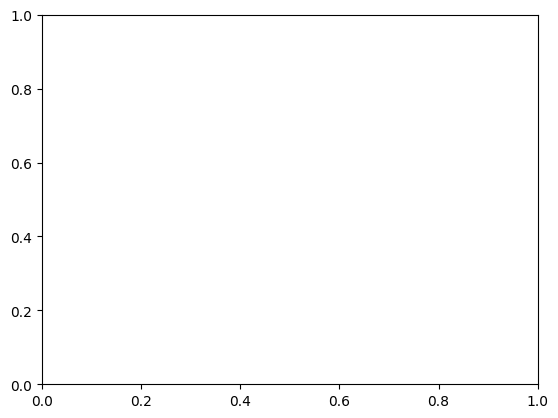

In [ ]:
#Plotting the circuit depth
plt.plot(Cut_off,qc_ref_depth,'rs-', label='Reference state')
plt.plot(Cut_off,qc_TMSV_depth,'go-', label='Two Mode Squeezed Vacuum (TMSV) ')
plt.plot(Cut_off,qc_TMSV_depth,'g')
plt.xlabel('Cutoff number')
plt.ylabel('Circuit depth')
plt.legend()
plt.savefig('Circuit_depth.png', dpi = 1200, transparent =True)
plt.show()

## Other code

In [ ]:
#Analytical value from the squeezing parameter
r = 1
alpha_1 = 1/np.cosh(r)
alpha_2 = -np.tanh(r)/np.cosh(r)
print(alpha_1, alpha_2)
theta = 2*np.arctan(alpha_2/alpha_1)
theta

0.6480542736638855 -0.49355434756457306


-1.3017603360460148

In [ ]:
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit
from numpy import pi

qreg_q = QuantumRegister(2, 'q')
creg_c = ClassicalRegister(2, 'c')
qc = QuantumCircuit(qreg_q, creg_c)


#theta = 0.5

qc.ry(theta, qreg_q[0])
qc.cx(qreg_q[0], qreg_q[1])
#qc.measure(qreg_q, creg_c)
#qc.draw('mpl')


In [ ]:
from qiskit import Aer
import numpy as np
# Run the quantum circuit on a statevector simulator backend
backend = Aer.get_backend('statevector_simulator')
job = backend.run(qc)
result = job.result()
outputstate = result.get_statevector(qc, decimals=3)
print(outputstate)

Statevector([ 0.796+0.j,  0.   +0.j,  0.   +0.j, -0.606+0.j],
            dims=(2, 2))


{'11 00': 1529, '00 00': 2567}
4096


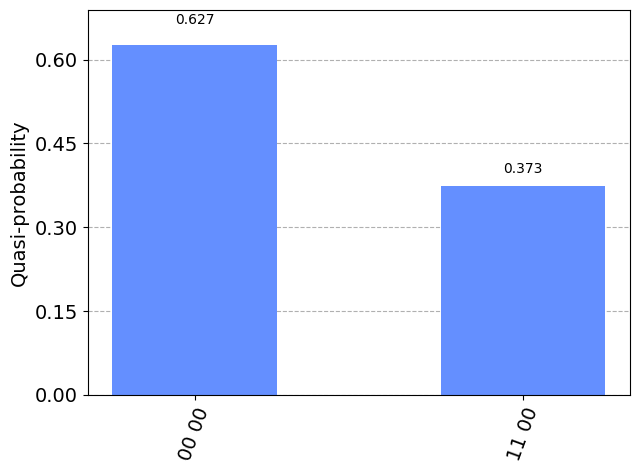

In [ ]:
aer_sim = Aer.get_backend('aer_simulator')
qc_transpiled = transpile(qc, aer_sim)
#qobj = assemble(qc_transpiled, shots=4096)
#result = aer_sim.run(qobj).result()

qc_transpiled.measure_all()
job = execute(qc_transpiled,Aer.get_backend('qasm_simulator'),shots=4096)
counts = job.result().get_counts()
print(counts)
total_counts = sum(counts.values())
probs = {outcome: count/total_counts for outcome, count in counts.items()}
print(total_counts)
# Print the probability distribution
plot_histogram(probs)


In [ ]:
depth = qc.depth()
depth

2

In [ ]:
#Implementing a 4 qubit
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit
from numpy import pi

qreg_q = QuantumRegister(4, 'q')
creg_c = ClassicalRegister(4, 'c')
qc = QuantumCircuit(qreg_q, creg_c)


qc.ry(theta, qreg_q[0])
qc.cx(qreg_q[0], qreg_q[2])

qc.ry(theta, qreg_q[1])
qc.cx(qreg_q[1], qreg_q[3])

#qc.measure(qreg_q, creg_c)
#qc.draw('mpl')


In [ ]:
from qiskit import Aer
import numpy as np

# Run the quantum circuit on a statevector simulator backend
backend = Aer.get_backend('statevector_simulator')
job = backend.run(qc)
result = job.result()
outputstate = result.get_statevector(qc, decimals=3)
print(outputstate)
probabilities = np.abs(outputstate) ** 2
print(probabilities)
qc.depth()
qc.draw()

Statevector([ 0.633+0.j,  0.   +0.j,  0.   +0.j,  0.   +0.j,  0.   +0.j,
             -0.482+0.j,  0.   +0.j,  0.   +0.j,  0.   +0.j,  0.   +0.j,
             -0.482+0.j,  0.   +0.j,  0.   +0.j,  0.   +0.j,  0.   +0.j,
              0.367+0.j],
            dims=(2, 2, 2, 2))
[0.400689 0.       0.       0.       0.       0.232324 0.       0.
 0.       0.       0.232324 0.       0.       0.       0.       0.134689]


┌─────────────┐          
q_0: ┤ Ry(-1.3018) ├──■───────
     ├─────────────┤  │       
q_1: ┤ Ry(-1.3018) ├──┼────■──
     └─────────────┘┌─┴─┐  │  
q_2: ───────────────┤ X ├──┼──
                    └───┘┌─┴─┐
q_3: ────────────────────┤ X ├
                         └───┘
c: 4/═════════════════════════

In [ ]:
aer_sim = Aer.get_backend('aer_simulator')
qc_transpiled = transpile(qc, aer_sim)
#qobj = assemble(qc_transpiled, shots=4096)
#result = aer_sim.run(qobj).result()

qc_transpiled.measure_all()
job = execute(qc_transpiled,Aer.get_backend('qasm_simulator'),shots=4096)
counts = job.result().get_counts()
print(counts)
total_counts = sum(counts.values())
probs = {outcome: count/total_counts for outcome, count in counts.items()}
print(total_counts)
# Print the probability distribution
plot_histogram(probs)
qc.depth()

{'1010 0000': 941, '0101 0000': 1005, '1111 0000': 523, '0000 0000': 1627}
4096


2

In [ ]:
qc_transpiled.draw()

┌─────────────┐           ░ ┌─┐         
   q_0: ┤ Ry(-1.3018) ├──■────────░─┤M├─────────
        ├─────────────┤  │        ░ └╥┘┌─┐      
   q_1: ┤ Ry(-1.3018) ├──┼────■───░──╫─┤M├──────
        └─────────────┘┌─┴─┐  │   ░  ║ └╥┘┌─┐   
   q_2: ───────────────┤ X ├──┼───░──╫──╫─┤M├───
                       └───┘┌─┴─┐ ░  ║  ║ └╥┘┌─┐
   q_3: ────────────────────┤ X ├─░──╫──╫──╫─┤M├
                            └───┘ ░  ║  ║  ║ └╥┘
   c: 4/═════════════════════════════╬══╬══╬══╬═
                                     ║  ║  ║  ║ 
meas: 4/═════════════════════════════╩══╩══╩══╩═
                                     0  1  2  3

In [ ]:
##Implementing a 4 qubit using Quantum fourier transform

qreg_q = QuantumRegister(4, 'q')
creg_c = ClassicalRegister(4, 'c')
qc = QuantumCircuit(qreg_q, creg_c)

r = 1
R = -np.tanh(r)#-0.5
k = 0
theta0 =  2*np.arctan(R**(2**k))
qc.ry(theta0, qreg_q[0])
qc.cx(qreg_q[0], qreg_q[2])

k = 1
theta1 =  2*np.arctan(R**(2**k))
qc.ry(theta1, qreg_q[1])
qc.cx(qreg_q[1], qreg_q[3])

#qc.measure(qreg_q, creg_c)
qc.draw()

┌─────────────┐          
q_0: ┤ Ry(-1.3018) ├──■───────
     └┬────────────┤  │       
q_1: ─┤ Ry(1.0512) ├──┼────■──
      └────────────┘┌─┴─┐  │  
q_2: ───────────────┤ X ├──┼──
                    └───┘┌─┴─┐
q_3: ────────────────────┤ X ├
                         └───┘
c: 4/═════════════════════════

In [ ]:
# Run the quantum circuit on a statevector simulator backend
backend = Aer.get_backend('statevector_simulator')
job = backend.run(qc)
result = job.result()
outputstate = result.get_statevector(qc, decimals=3)
print(outputstate)
probabilities = np.abs(outputstate) ** 2
print(probabilities)
qc.depth()
qc.draw()

Statevector([ 0.688+0.j,  0.   +0.j,  0.   +0.j,  0.   +0.j,  0.   +0.j,
             -0.524+0.j,  0.   +0.j,  0.   +0.j,  0.   +0.j,  0.   +0.j,
              0.399+0.j,  0.   +0.j,  0.   +0.j,  0.   +0.j,  0.   +0.j,
             -0.304+0.j],
            dims=(2, 2, 2, 2))
[0.473344 0.       0.       0.       0.       0.274576 0.       0.
 0.       0.       0.159201 0.       0.       0.       0.       0.092416]


┌─────────────┐          
q_0: ┤ Ry(-1.3018) ├──■───────
     └┬────────────┤  │       
q_1: ─┤ Ry(1.0512) ├──┼────■──
      └────────────┘┌─┴─┐  │  
q_2: ───────────────┤ X ├──┼──
                    └───┘┌─┴─┐
q_3: ────────────────────┤ X ├
                         └───┘
c: 4/═════════════════════════

{'1111 0000': 372, '1010 0000': 646, '0000 0000': 1899, '0101 0000': 1179}
4096


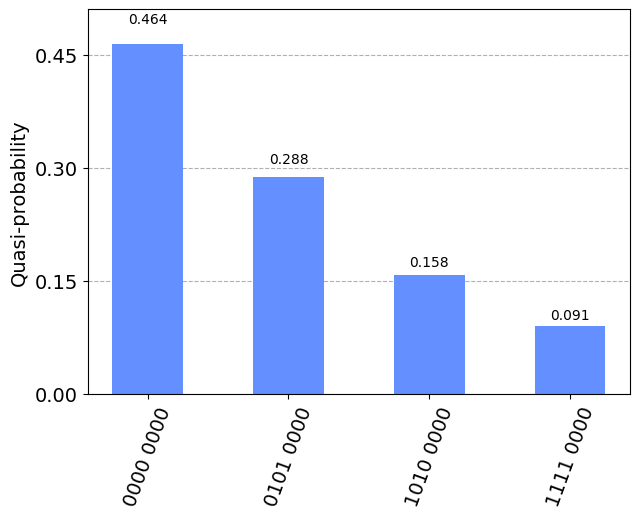

In [ ]:
aer_sim = Aer.get_backend('aer_simulator')
qc_transpiled = transpile(qc, aer_sim)
#qobj = assemble(qc_transpiled, shots=4096)
#result = aer_sim.run(qobj).result()

qc_transpiled.measure_all()
job = execute(qc_transpiled,Aer.get_backend('qasm_simulator'),shots=4096)
counts = job.result().get_counts()
print(counts)
total_counts = sum(counts.values())
probs = {outcome: count/total_counts for outcome, count in counts.items()}
print(total_counts)
# Print the probability distribution
plot_histogram(probs)


In [ ]:
qc_transpiled.draw()

┌─────────────┐           ░ ┌─┐         
   q_0: ┤ Ry(-1.3018) ├──■────────░─┤M├─────────
        └┬────────────┤  │        ░ └╥┘┌─┐      
   q_1: ─┤ Ry(1.0512) ├──┼────■───░──╫─┤M├──────
         └────────────┘┌─┴─┐  │   ░  ║ └╥┘┌─┐   
   q_2: ───────────────┤ X ├──┼───░──╫──╫─┤M├───
                       └───┘┌─┴─┐ ░  ║  ║ └╥┘┌─┐
   q_3: ────────────────────┤ X ├─░──╫──╫──╫─┤M├
                            └───┘ ░  ║  ║  ║ └╥┘
   c: 4/═════════════════════════════╬══╬══╬══╬═
                                     ║  ║  ║  ║ 
meas: 4/═════════════════════════════╩══╩══╩══╩═
                                     0  1  2  3

## Improved approach

### Mathematical explanation

In order to find a better solution for creating the desired state, we analyze and reformulate the mathematically definition of the state $|\text{TMSV}\rangle = \frac{1}{\cosh(r)} \sum_{k=0}^\infty \left(-e^{i\phi} \tanh(r)\right)^k|kk\rangle$.

First, we drop the normalization prefactor $1/\cosh(r)$ and choose a cutoff of $N=2^n$. (Note that this cutoff implies that the normalization prefactor will no longer be $1/\cosh(r)$.) Afterwards we rewrite the sum from the number basis into a binary representation, which means that we replace $k$ by $(k_n,k_{n-1},\dots,k_1,k_0)$ such that $k=\sum_{j=0}^n k_j\cdot 2^j$, where $k_j\in \{0,1\}$. This leads to the following formula (where we also replaced $-e^{i\phi} \tanh(r)$ by $R$ to make it easier to read):

$\begin{align}
|\psi\rangle & = \sum_{(k_n,...,k_0)\in \{0,1\}^n} R^{(k_n,...,k_0)} |(k_n,...,k_0)(k_n,...,k_0)\rangle \\
& = \sum_{(k_n,...,k_0)\in \{0,1\}^n} R^{k_n 2^n}R^{k_{n-1}2^{n-1}}\cdots R^{k_1 2}R^{k_0} |(k_n,...,k_0)(k_n,...,k_0)\rangle \\
& = \left(\sum_{k_n=0}^1 R^{k_n 2^n}|k_n\rangle |k_n \rangle\right) \otimes\sum_{(k_{n-1},...,k_0)} R^{k_{n-1}2^{n-1}}\cdots R^{k_1 2}R^{k_0} |(k_{n-1},...,k_0)(k_{n-1},...,k_0)\rangle \\
& = \left(\sum_{k_n=0}^1 R^{k_n 2^n}|k_n\rangle |k_n\rangle\right) \otimes \dots \otimes \left(\sum_{k_1=0}^1 R^{k_1 2}|k_1\rangle |k_1\rangle \right) \otimes \left(\sum_{k_0=0}^1 R^{k_0}|k_0\rangle|k_0\rangle\right) \\
& =(|0\rangle |0\rangle + R^{2^n} |1\rangle |1\rangle)\otimes \cdots \otimes (|0\rangle |0\rangle + R^2 |1\rangle |1\rangle ) \otimes (|0\rangle |0\rangle + R |1\rangle |1\rangle )
\end{align}$

We arrived at a product state which is the product of states of the form $|00\rangle + R^{2^j} |11\rangle $, for $j=0,\dots,n$. We will show how these states can be easily created by applying a $\text{R}_Y$-gate and a $\text{CNOT}$. To find the right angle $\theta_j$ for the $\text{Y}$-rotation we will only consider the first qubit for a moment. The ratio between $|0\rangle$ and $|1\rangle$ is given by $R^{2^j}=\tan(\theta_j /2 )$, and therefore $\theta_j = 2\arctan(R^{2^j})$. Now, after we have found the right value for the angle we can apply a $\text{CNOT}$-gate between the two qubits to turn $(|0\rangle + R^{2^j} |1\rangle) \otimes | 0 \rangle$ into $|00\rangle + R^{2^j} |11\rangle$. Therefore, we can create the state $|\psi\rangle$ from the zero-state in the following way (note that $ R = -e^{i\phi} \tanh(r) $):

$\left(\text{CNOT} \cdot (\text{R}_Y(\theta_n)\otimes Ι )\otimes \dots \otimes \text{CNOT} \cdot (\text{R}_Y(\theta_1)\otimes Ι ) \otimes \text{CNOT} \cdot (\text{R}_Y(\theta_0)\otimes Ι )\right)|0\rangle_n|0\rangle_n$

From now on, we set $\phi = \pi$ for simplicity, such that the rotation matrix is real. If we allow also other values of $\phi$, instead of $\text{R}_Y$ rotation, we would have to use more general local unitary, increasing the depth by 2.

### Code

Input parameters:

In [ ]:
N = 5 # number of qubits is 2*N
r = 0.99 # squeezing parameter

Circuit:

In [ ]:
# like in the mathematical derivation, here we split the 2*N qubits into two registers
# the first register (first N qubits) contains the first qubits in each pair
# the second register (qubits N+1 till 2*N) contains the second qubits in each pair

# determine the rotation angle
def rot_angle(r, q):
  R = np.tanh(r)
  return 2*np.arccos(1/np.sqrt(1+R**(2 ** (q + 1))))

# circuit
circ = QuantumCircuit(2*N, 2*N)
for q in range(N):
  circ.ry(rot_angle(r, q), q)
  circ.cx(q, q+N)
  circ.measure(q, q)
  # circ.measure(q+N, q+N)

for q in range(N, 2*N):
  circ.measure(q, q)

circ.draw()

┌────────────┐                          ┌─┐                           
 q_0: ─┤ Ry(1.2964) ├───■──────────────────────┤M├───────────────────────────
       ├────────────┤   │                      └╥┘┌─┐                        
 q_1: ─┤ Ry(1.0416) ├───┼────■──────────────────╫─┤M├────────────────────────
      ┌┴────────────┤   │    │                  ║ └╥┘┌─┐                     
 q_2: ┤ Ry(0.63572) ├───┼────┼────■─────────────╫──╫─┤M├─────────────────────
      ├─────────────┤   │    │    │             ║  ║ └╥┘┌─┐                  
 q_3: ┤ Ry(0.21566) ├───┼────┼────┼────■────────╫──╫──╫─┤M├──────────────────
      ├─────────────┴┐  │    │    │    │        ║  ║  ║ └╥┘┌─┐               
 q_4: ┤ Ry(0.023435) ├──┼────┼────┼────┼────■───╫──╫──╫──╫─┤M├───────────────
      └──────────────┘┌─┴─┐  │    │    │    │   ║  ║  ║  ║ └╥┘┌─┐            
 q_5: ────────────────┤ X ├──┼────┼────┼────┼───╫──╫──╫──╫──╫─┤M├────────────
                      └───┘┌─┴─┐  │    │    │   ║  ║  ║  ║  ║ └╥┘┌─┐         
 q_6: ─────────────────────┤ X ├──┼────┼────┼───╫──╫──╫──╫──╫──╫─┤M├─────────
                           └───┘┌─┴─┐  │    │   ║  ║  ║  ║  ║  ║ └╥┘┌─┐      
 q_7: ──────────────────────────┤ X ├──┼────┼───╫──╫──╫──╫──╫──╫──╫─┤M├──────
                                └───┘┌─┴─┐  │   ║  ║  ║  ║  ║  ║  ║ └╥┘┌─┐   
 q_8: ───────────────────────────────┤ X ├──┼───╫──╫──╫──╫──╫──╫──╫──╫─┤M├───
                                     └───┘┌─┴─┐ ║  ║  ║  ║  ║  ║  ║  ║ └╥┘┌─┐
 q_9: ────────────────────────────────────┤ X ├─╫──╫──╫──╫──╫──╫──╫──╫──╫─┤M├
                                          └───┘ ║  ║  ║  ║  ║  ║  ║  ║  ║ └╥┘
c: 10/══════════════════════════════════════════╩══╩══╩══╩══╩══╩══╩══╩══╩══╩═
                                                0  1  2  3  4  5  6  7  8  9

Circuit depth (including the measurements):

In [ ]:
circ.depth()

3

Simulation:

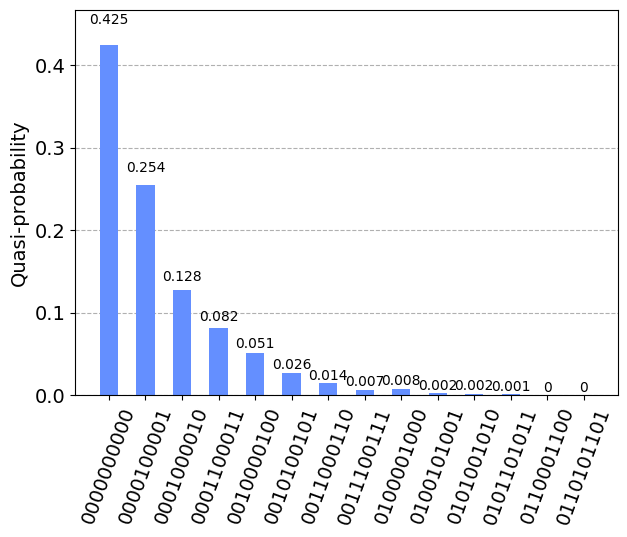

In [ ]:
backend = Aer.get_backend('statevector_simulator')
job = backend.run(circ, shots=4096)
counts = job.result().get_counts()
# plot_histogram(counts)
plot_distribution(counts)

Compare with the expected profile:

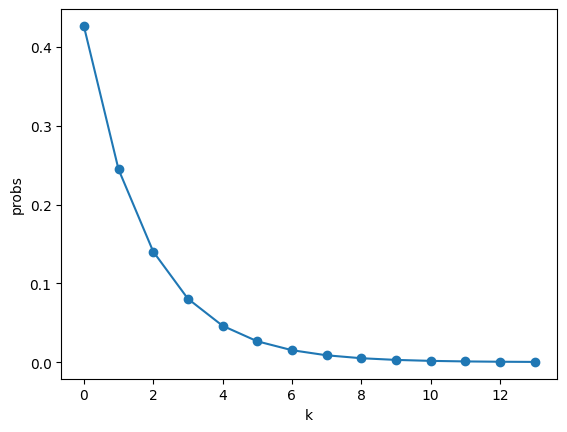

In [ ]:
ran = range(len(counts))
tanh_vals = (np.tanh(r) ** ran) ** 2
tanh_vals /= np.sum(np.abs(tanh_vals))
plt.plot(ran, tanh_vals, '-o')
plt.xlabel('k')
plt.ylabel('probs')
plt.show()

Differences of the two profiles:

In [ ]:
norm_counts = [x for x in reversed(sorted(list(counts.values())))]
norm_counts = np.array(norm_counts) / sum(norm_counts)
print(tanh_vals - norm_counts)

[ 2.01979756e-03 -9.70903102e-03  1.26654909e-02 -1.03793769e-03
 -4.60375014e-03  3.64260381e-04  1.03290201e-03  1.14634375e-03
 -1.59306329e-03  4.25855786e-04 -6.43294939e-05 -5.21473509e-04
  5.28337411e-05 -1.77898941e-04]
